# [E-15] OCR
_____

## 목차
### 1. 개요
    1.1 들어가기에 앞서
    1.2 루브릭 평가기준
 
### 2. 프로젝트 : 다양한 OCR모델 비교하기
    2.1 검증용 데이터셋 준비
    2.2 keras-ocr로 테스트 진행
    2.3 Tesseract로 테스트 진행

### 3. 결론
    3.1 결론
    3.2 회고
    
-----

## 1. 개요

### 1.1 들어가기에 앞서

#### 학습 목표

- OCR의 과정을 이해합니다.
- 문자인식 결과의 표현방식을 이해합니다.
- 파이썬을 통해 OCR을 사용할 수 있습니다.
- Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR기능을 검증해본다.
---

### 1.2 루브릭 평가기준

평가문항|상세기준
-|-
1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

---

## 2. 프로젝트 : 다양한 OCR모델 비교하기

### 2.1 검증용 데이터셋 준비

In [1]:
import os
 
path = os.getenv('HOME')+'/aiffel/ocr_python/ocr'
ocr_image = os.listdir(path)
sorted(ocr_image)

['.ipynb_checkpoints',
 'ocr01.jpg',
 'ocr02.jpg',
 'ocr03.jpg',
 'ocr04.jpg',
 'ocr05.jpg',
 'ocr06.jpeg',
 'ocr07.jpg']

---

### 2.2 keras-ocr로 테스트 진행

In [2]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://images.velog.io/images/khkk4953/post/344ae080-37e8-4868-958b-5421c8604265/ocr01.jpg',
  'https://images.velog.io/images/khkk4953/post/ea41b902-da01-4939-a37d-8ee461c0e3c0/ocr02.jpg',
  'https://images.velog.io/images/khkk4953/post/48c11a1a-cd75-4d6d-b617-9281e2f2b84d/ocr03.jpg',
  'https://images.velog.io/images/khkk4953/post/d7fee932-ef4b-496d-b728-6d77d11d9d76/ocr04.jpg',
  'https://images.velog.io/images/khkk4953/post/47d409c1-5452-4af4-bec5-d071d3a95451/ocr05.jpg',
  'https://images.velog.io/images/khkk4953/post/bf523a2f-33e6-4e96-ac1e-b012408ed487/ocr06.jpeg',
  'https://images.velog.io/images/khkk4953/post/8a1327e3-8f99-4f44-a257-d679b0b573f4/ocr07.jpg'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

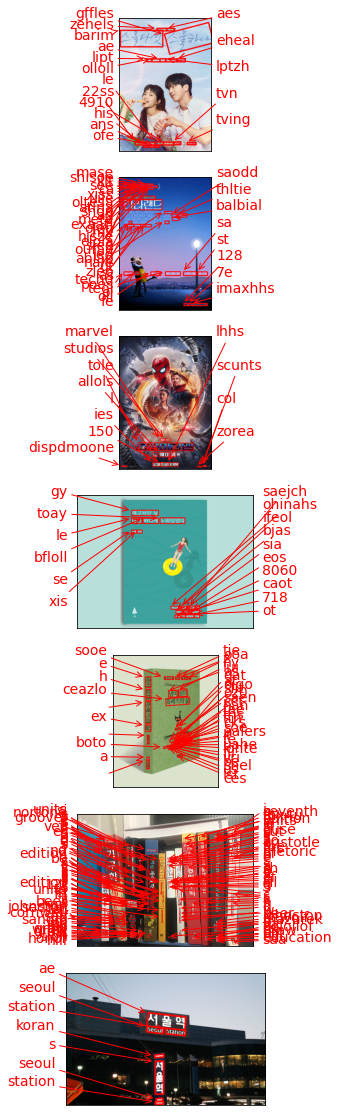

In [4]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

---

### 2.3 Tesseract로 테스트 진행 

In [5]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

In [6]:
# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [7]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/ocr'
img_file_path = work_dir + '/ocr01.jpg'   

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/ocr/0000.png
/aiffel/aiffel/ocr_python/ocr/0001.png
/aiffel/aiffel/ocr_python/ocr/0002.png
/aiffel/aiffel/ocr_python/ocr/0003.png
/aiffel/aiffel/ocr_python/ocr/0004.png
/aiffel/aiffel/ocr_python/ocr/0005.png
/aiffel/aiffel/ocr_python/ocr/0006.png
/aiffel/aiffel/ocr_python/ocr/0007.png
/aiffel/aiffel/ocr_python/ocr/0008.png
/aiffel/aiffel/ocr_python/ocr/0009.png
/aiffel/aiffel/ocr_python/ocr/0010.png
/aiffel/aiffel/ocr_python/ocr/0011.png
/aiffel/aiffel/ocr_python/ocr/0012.png
/aiffel/aiffel/ocr_python/ocr/0013.png
/aiffel/aiffel/ocr_python/ocr/0014.png
/aiffel/aiffel/ocr_python/ocr/0015.png
/aiffel/aiffel/ocr_python/ocr/0016.png
/aiffel/aiffel/ocr_python/ocr/0017.png
/aiffel/aiffel/ocr_python/ocr/0018.png
/aiffel/aiffel/ocr_python/ocr/0019.png
/aiffel/aiffel/ocr_python/ocr/0020.png
/aiffel/aiffel/ocr_python/ocr/0021.png


In [8]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

리티

그

|

ㅣ

=


혁

이

7

개


녀|기

1

너

어

| 있곳

내7>

가서

다

_ ：，

|

6 :

Done


In [9]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/ocr'
img_file_path = work_dir + '/ocr07.jpg'   

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/ocr/0000.png
/aiffel/aiffel/ocr_python/ocr/0001.png
/aiffel/aiffel/ocr_python/ocr/0002.png
/aiffel/aiffel/ocr_python/ocr/0003.png
/aiffel/aiffel/ocr_python/ocr/0004.png
/aiffel/aiffel/ocr_python/ocr/0005.png
/aiffel/aiffel/ocr_python/ocr/0006.png
/aiffel/aiffel/ocr_python/ocr/0007.png
/aiffel/aiffel/ocr_python/ocr/0008.png
/aiffel/aiffel/ocr_python/ocr/0009.png


In [10]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

도


‥$}

그]

[6

| |

리

이 00 이이 거



Done


In [11]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/ocr'
img_file_path = work_dir + '/ocr06.jpeg'   

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/ocr/0000.png
/aiffel/aiffel/ocr_python/ocr/0001.png
/aiffel/aiffel/ocr_python/ocr/0002.png
/aiffel/aiffel/ocr_python/ocr/0003.png
/aiffel/aiffel/ocr_python/ocr/0004.png
/aiffel/aiffel/ocr_python/ocr/0005.png
/aiffel/aiffel/ocr_python/ocr/0006.png
/aiffel/aiffel/ocr_python/ocr/0007.png
/aiffel/aiffel/ocr_python/ocr/0008.png
/aiffel/aiffel/ocr_python/ocr/0009.png
/aiffel/aiffel/ocr_python/ocr/0010.png
/aiffel/aiffel/ocr_python/ocr/0011.png
/aiffel/aiffel/ocr_python/ocr/0012.png
/aiffel/aiffel/ocr_python/ocr/0013.png
/aiffel/aiffel/ocr_python/ocr/0014.png
/aiffel/aiffel/ocr_python/ocr/0015.png
/aiffel/aiffel/ocr_python/ocr/0016.png
/aiffel/aiffel/ocr_python/ocr/0017.png
/aiffel/aiffel/ocr_python/ocr/0018.png
/aiffel/aiffel/ocr_python/ocr/0019.png
/aiffel/aiffel/ocr_python/ocr/0020.png
/aiffel/aiffel/ocr_python/ocr/0021.png
/aiffel/aiffel/ocr_python/ocr/0022.png
/aiffel/aiffel/ocr_python/ocr/0023.png
/aiffel/aiffel/ocr_python/ocr/0024.png
/aiffel/aiffel/ocr_python

In [12]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


. 발캐'


니시

 벼



닉

거너

)「

‥

개

|

1

(》

(1


 1                  .                     :


소제

1

1

~.

-_

,

시

:

~

그

:

(1

0


이


10 |

:

;

~

12140

 (

1100

11


011[ㄴ

160

10000

우이 니시이!

가이

[이

년

(그


이


이


01021

'


~

:

(


=


아


본

여


>

0

이애

가

8:

~

6

다

~

…



일

|:

세

건

협

0)결

0

2:

들

소개

이

내

!

그니



11

이

】

나

개

때 2 20. 2

1 』

6

아우 앨


|


객    ”


:

{혀

--

해

깝

에

다

비소

고바

!

0 |

|

(자

~

-보

~

(》

1

| 개



애

아가

1

~


가보

6066

“_

!

다카하시

1

타

[-

  「:

/

0 (

{

의

- 0

는

…빼

으루"

구지

…”

- ~ _

도

개

3

악

:

성

」 ,

/

으르

주 |

는 ^“ 이버

1

/

온라

로

기



로


가

시.


--

나으 1


7

소타 111

여연]

1

.

0 =

고

레

1

”

이

[배기

6

|

0

는 산인우

101105100

|

'

나 11

그

04114

Done


---

## 3. 결론

### 3.1 결론

데이터셋 이미지는 드라마,영화 포스터, 책 표지, 지하철 전광판 등을 사용했다.

keras-ocr

- keras-ocr은 영어든 한국어든 문자로 된 것은 인식이 잘 되었고 비교적 성능이 좋은 것 같다.
- 문자를 인식함에는 문제가 없으나, 한국어를 영어로 표출하는 문제점이 발생했다.

Tesseract

- 1번(드라마 포스터), 6번(책), 7번(지하철 전광판)을 각각 테스트해봤는데, 성능이 매우 좋지 않았다.

- 100개의 문자가 있다면 1~2개의 문자만 제대로 인식될 수준의 성능인 것 같다.

두 개의 OCR 중에서는 keras-ocr이 더 훌륭한 것 같다.

---

### 3.2 회고


- OCR 기능이 정말 좋은 것 같으나, 아직 성능이 부족한 것을 많이 느꼈다. 성능 면에서는 프로젝트에서 적용해보지 못한 Google OCR API가 제일 훌륭한 것 같다.

- 테서렉트에서 1번과 6번의 경우 문자가 많이 표기된 데이터를 사용하지 않았기에 무엇을 인식한지 모를 수준이다. 다만 7번의 경우 그나마 문자가 많이 있기에 몇 개의 문자는 인식한 것을 찾아냈다. 문자 인식에 있어, 문자의 크기 문제인 것 같다라는 생각은 들지만 인식의 정확성 판단을 위해 충분한 데이터가 필요함을 깨달았다.

- 아쉬움이 있다면 문제점들을 개선할 방법을 찾지 못했다. 그나마 제시할 수 있는 것은 데이터의 문제가 아니지 않을까 싶다.